### Bias & Fairness in Data: Distribution Check
**Description**: Load the Adult Income dataset and check for representation bias by analyzing the distribution of gender across different income levels.

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Gender Distribution Across Income Levels:
 sex      Female   Male
income                
 <=50K  

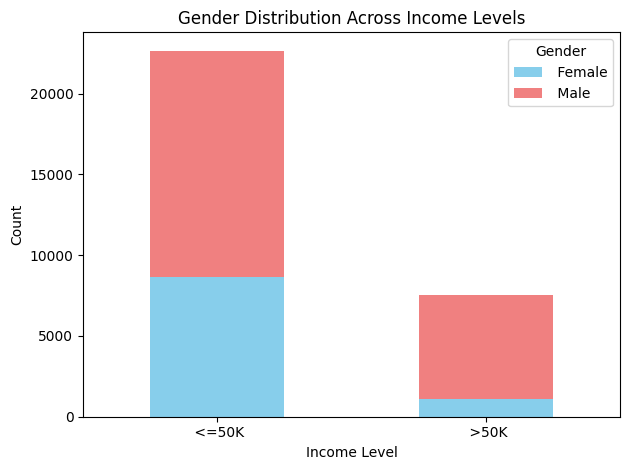

In [1]:
# write your code from here
# --- Step 1: Import Required Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Load the Adult Income Dataset ---
# Make sure the dataset is available in your working directory or load from an external source
# df = pd.read_csv('adult.csv')  # Uncomment if using a local CSV file

# Alternatively, you can load the dataset from an online URL (if available)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                'native-country', 'income']
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
df.head()

# --- Step 3: Clean the Data ---
# Check for any missing or incorrectly formatted values
df.isnull().sum()

# Remove any extra spaces in column names (if necessary)
df.columns = df.columns.str.strip()

# We can replace any '?' or missing values if needed
df.replace(' ?', pd.NA, inplace=True)
df.dropna(inplace=True)

# Display the cleaned dataset info
df.info()

# --- Step 4: Analyze Gender Distribution Across Income Levels ---
# Group by income and sex, and calculate the counts
gender_income_distribution = df.groupby(['income', 'sex']).size().unstack()

# Display the distribution of gender across income classes
print("\nGender Distribution Across Income Levels:\n", gender_income_distribution)

# --- Step 5: Visualize the Distribution ---
# Plot the distribution of gender for each income level (<=50K and >50K)
gender_income_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution Across Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()
